In [20]:
import pandas as pd

def read_tsv_to_dataframe(file_path, selected_columns=None):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    header = lines[0].strip().split('\t')

    data = []

    for line in lines[3:]:
        fields = line.strip().split('\t')
        data.append(fields[:211])

    df = pd.DataFrame(data, columns=header)
    
    if selected_columns!=None:
        df = df[selected_columns]
        
    return df

def ECdata(Towers=['K67', 'K77', 'K83']):
    file_head = 'CD32_Fluxes_Brazil_1842/data/'
    file_tail = 'day_CfluxBF.txt'
    selected_columns = ['Year_LBAMIP', 'DoY_LBAMIP', 'Hour_LBAMIP', 'NEEnogap_5day_sco2_ust']
    data_dict = {}

    for tower in Towers:
        file_path = file_head + tower + file_tail
        df = read_tsv_to_dataframe(file_path, selected_columns)
        df.rename(columns={'Year_LBAMIP': 'Year', 'DoY_LBAMIP': 'Julian_Day', 'Hour_LBAMIP': 'Hour', 'NEEnogap_5day_sco2_ust': 'NEE'}, inplace=True)
        data_dict[tower] = df
    
    return data_dict

dict_ECdata = ECdata()

In [22]:
import pandas as pd

def read_tsv_to_dataframe(file_path, selected_columns=None):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    header = lines[0].strip().split('\t')

    data = []

    for line in lines[3:]:
        fields = line.strip().split('\t')
        data.append(fields[:211])

    df = pd.DataFrame(data, columns=header)
    
    if selected_columns is not None:
        df = df[selected_columns]
        
    # Convert Julian Day and Year to date
    df['Year'] = df['Year_LBAMIP'].astype(float).astype(int)
    df['Julian_Day'] = df['DoY_LBAMIP'].astype(float).astype(int)
    df['date'] = pd.to_datetime(df['Year'], format='%Y') + pd.to_timedelta(df['Julian_Day'] - 1, unit='D')
    
    return df

def ECdata(Towers=['K67', 'K77', 'K83']):
    file_head = 'CD32_Fluxes_Brazil_1842/data/'
    file_tail = 'day_CfluxBF.txt'
    selected_columns = ['Year_LBAMIP', 'DoY_LBAMIP', 'Hour_LBAMIP', 'NEEnogap_5day_sco2_ust']
    data_dict = {}

    for tower in Towers:
        file_path = file_head + tower + file_tail
        df = read_tsv_to_dataframe(file_path, selected_columns)
        df.rename(columns={'Hour_LBAMIP': 'Hour', 'NEEnogap_5day_sco2_ust': 'NEE'}, inplace=True)
        data_dict[tower] = df
    
    return data_dict

dict_ECdata = ECdata()
dict_ECdata['K67'].head()


,Year_LBAMIP,DoY_LBAMIP,Hour,NEE,Year,Julian_Day,date
0,2.0020000000000000e+03,1.0000000000000000e+00,0.0000000000000000e+00,2.8214386326695795e+00,2002,1,2002-01-01
1,2.0020000000000000e+03,2.0000000000000000e+00,0.0000000000000000e+00,2.8214386326695795e+00,2002,2,2002-01-02
2,2.0020000000000000e+03,3.0000000000000000e+00,0.0000000000000000e+00,2.8214386326695795e+00,2002,3,2002-01-03
3,2.0020000000000000e+03,4.0000000000000000e+00,0.0000000000000000e+00,2.7179280023681329e+00,2002,4,2002-01-04
4,2.0020000000000000e+03,5.0000000000000000e+00,0.0000000000000000e+00,2.6996663399080165e+00,2002,5,2002-01-05


In [23]:
import ee
ee.Initialize()

lst = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2')

i_date = '2000-01-01'

f_date = '2007-01-01'

scale = 500

lst = lst.select('SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7').filterDate(i_date, f_date)

k67_poi = ee.Geometry.Point(-54.959, -2.857)

lst_k67_poi = lst.getRegion(k67_poi, scale).getInfo()

k77_poi = ee.Geometry.Point(-54.8885, -3.0202)

lst_k77_poi = lst.getRegion(k77_poi, scale).getInfo()

k83_poi = ee.Geometry.Point(-54.9707, -3.017)

lst_k83_poi = lst.getRegion(k83_poi, scale).getInfo()

In [24]:
lst_k67 = pd.DataFrame(lst_k67_poi[1:], columns=lst_k67_poi[0])
lst_k67

,id,longitude,latitude,time,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B7
0,LE07_227062_20000202,-54.961175,-2.858888,949498860034,65535,64882,65535,39158,21628,15288
1,LE07_227062_20000218,-54.961175,-2.858888,950881253583,22787,18777,18564,24147,13983,12094
2,LE07_227062_20000321,-54.961175,-2.858888,953646049325,21622,17250,18742,21286,17480,14495
3,LE07_227062_20000406,-54.961175,-2.858888,955028438599,15017,14428,14518,20949,16496,14023
4,LE07_227062_20000422,-54.961175,-2.858888,956410831151,8189,8353,8114,12726,10001,8501
...,...,...,...,...,...,...,...,...,...,...
101,LE07_227062_20060829,-54.961175,-2.858888,1156858670545,8479,9036,8410,20199,12785,9275
102,LE07_227062_20060914,-54.961175,-2.858888,1158241065533,10791,11181,10700,20366,13762,11192
103,LE07_227062_20060930,-54.961175,-2.858888,1159623458361,50003,38221,51408,34907,54494,26459
104,LE07_227062_20061117,-54.961175,-2.858888,1163770690423,35891,28202,32366,28160,26629,19939


In [ ]:
import pandas as pd
from datetime import datetime

# Assuming lst_k67 is already defined as the DataFrame

def add_year_and_julian_day(df):
    df['date_str'] = df['id'].str.split('_').str[-1]
    df['date'] = pd.to_datetime(df['date_str'], format='%Y%m%d')
    df = df.drop(columns=['date_str'])
    
    return df

# Applying the function to lst_k67
lst_k67 = add_year_and_julian_day(lst_k67)

# Display the new DataFrame
lst_k67


In [ ]:
ec = dict_ECdata['K67']
sat = lst_k67

merged = pd.merge(ec, sat, on='date', suffixes=('_ec', '_sat'), how='inner')

merged

In [ ]:
import pandas as pd
import ee
ee.Initialize()

def read_tsv_to_dataframe(file_path, selected_columns=None):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    header = lines[0].strip().split('\t')

    data = []

    for line in lines[3:]:
        fields = line.strip().split('\t')
        data.append(fields[:211])

    df = pd.DataFrame(data, columns=header)
    
    if selected_columns is not None:
        df = df[selected_columns]
        
    # Convert Julian Day and Year to date
    df['Year'] = df['Year_LBAMIP'].astype(float).astype(int)
    df['Julian_Day'] = df['DoY_LBAMIP'].astype(float).astype(int)
    df['date'] = pd.to_datetime(df['Year'], format='%Y') + pd.to_timedelta(df['Julian_Day'] - 1, unit='D')
    
    return df

def combined_data(Towers=['K67', 'K77', 'K83']):
    file_head = 'CD32_Fluxes_Brazil_1842/data/'
    file_tail = 'day_CfluxBF.txt'
    selected_columns = ['Year_LBAMIP', 'DoY_LBAMIP', 'Hour_LBAMIP', 'NEEnogap_5day_sco2_ust']
    data_dict = {}
    lst = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2')
    i_date = '2000-01-01'
    f_date = '2007-01-01'
    scale = 500
    lst = lst.select('SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7').filterDate(i_date, f_date)
    
    def add_year_and_julian_day(df):
        df['date_str'] = df['id'].str.split('_').str[-1]
        df['date'] = pd.to_datetime(df['date_str'], format='%Y%m%d')
        df = df.drop(columns=['date_str'])
    
        return df

    for tower in Towers:
        if tower == 'K67':
            poi = ee.Geometry.Point(-54.959, -2.857)
        elif tower == 'K77':
            poi = ee.Geometry.Point(-54.8885, -3.0202)
        elif tower == 'K83':
            poi = ee.Geometry.Point(-54.9707, -3.017)
        file_path = file_head + tower + file_tail
        ec_df = read_tsv_to_dataframe(file_path, selected_columns)
        ec_df.rename(columns={'Hour_LBAMIP': 'Hour', 'NEEnogap_5day_sco2_ust': 'NEE'}, inplace=True)
        
        lst_poi = lst.getRegion(poi, scale).getInfo()
        sat_df = pd.DataFrame(lst_poi[1:], columns=lst_poi[0])
        sat_df = add_year_and_julian_day(sat_df)        
        
        df = pd.merge(ec_df, sat_df, on='date', how='inner')
        
        data_dict[tower] = df
    
    return data_dict

data_dict = combined_data()

In [4]:
import ee
ee.Initialize()

lst = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2')
i_date = '2000-01-01'
f_date = '2007-01-01'
poi = ee.Geometry.Point(-54.959, -2.857)
scale = 100
lst = lst.select('SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6').filterDate(i_date, f_date)

def add_year_and_julian_day(df):
    df['date_str'] = df['id'].str.split('_').str[-1]
    df['date'] = pd.to_datetime(df['date_str'], format='%Y%m%d')
    df = df.drop(columns=['date_str'])
    
    return df
    
lst_poi = lst.getRegion(poi, scale).getInfo()
sat_df = pd.DataFrame(lst_poi[1:], columns=lst_poi[0])
sat_df = add_year_and_julian_day(sat_df)
for column in ['SR_B1','SR_B2','SR_B3','SR_B4','SR_B5','SR_B7']:
    sat_df[column] = sat_df[column].astype(float) * 2.75e-05
sat_df['ST_B6'] = sat_df['ST_B6'].astype(float) * 0.00341802
sat_df['NDVI'] = (sat_df['SR_B4'].astype(float) - sat_df['SR_B3'].astype(float)) / (sat_df['SR_B4'].astype(float) + sat_df['SR_B3'].astype(float))
sat_df['EVI'] = 2.5 * (sat_df['SR_B4'].astype(float) - sat_df['SR_B3'].astype(float)) / (sat_df['SR_B4'].astype(float) + 2.4 * sat_df['SR_B3'].astype(float) + 1)

sat_df.head()

,id,longitude,latitude,time,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B7,ST_B6,date,NDVI,EVI
0,LE07_227062_20000202,-54.959378,-2.857092,949498860034,1.802212,1.802212,1.802212,0.846697,0.479408,0.347958,119.972502,2000-02-02,-0.360720,-0.387036
1,LE07_227062_20000218,-54.959378,-2.857092,950881253583,0.490875,0.495578,0.489665,0.658075,0.380573,0.326288,93.831485,2000-02-18,0.146732,0.148600
2,LE07_227062_20000321,-54.959378,-2.857092,953646049325,1.160143,0.557893,0.565015,0.681092,0.581213,0.483588,148.215601,2000-03-21,0.093152,0.095549
3,LE07_227062_20000406,-54.959378,-2.857092,955028438599,0.398723,0.396275,0.400867,0.576840,0.455648,0.391545,125.321703,2000-04-06,0.179985,0.173275
4,LE07_227062_20000422,-54.959378,-2.857092,956410831151,0.844855,0.565373,0.561852,0.678013,0.561605,0.450945,140.713047,2000-04-22,0.093688,0.095954


In [ ]:
import ee
import geemap
ee.Initialize()

# Define a Geometry object.
geometry = ee.Geometry({
    'type': 'Polygon',
    'coordinates': [[
        [-122.081, 37.417],
        [-122.086, 37.421],
        [-122.084, 37.418],
        [-122.089, 37.416],
    ]],
})

# Apply the bounds method to the Geometry object.
geometry_bounds = geometry.bounds()

# Print the result.
display('geometry.bounds(...) =', geometry_bounds)

# Display relevant geometries on the map.
m = geemap.Map()
m.set_center(-122.085, 37.422, 15)
m.add_layer(geometry, {'color': 'black'}, 'Geometry')

In [32]:
import ee
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import numpy as np

ee.Initialize()
poi = ee.Geometry.Point(-54.959, -2.857)
poi_buffer = poi.buffer(150).bounds()

lst = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2')
i_date = '2000-01-01'
f_date = '2007-01-01'
scale = 500
lst = lst.select('SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7').filterDate(i_date, f_date)

lst_poi = lst.getRegion(poi, scale)

arr = lst_poi.toList(300)
url = ee.Image(arr.get(0)).getDownloadUrl({'bands':['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7'], 'format':'NPY'})
response = requests.get(url)
data = np.load(io.BytesIO(response.content))
data

AttributeError: 'List' object has no attribute 'toList'

In [14]:
import ee
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import numpy as np
from data import combined_data

ee.Initialize()

def add_date_column(df):
    # Ensure the 'id' column exists
    if 'id' not in df.columns:
        raise ValueError("DataFrame must contain an 'id' column")
    
    # Convert the 'id' column to datetime and add as new 'date' column
    df['date'] = pd.to_datetime(df['id'], format='%Y-%m-%d')
    
    return df

ds = ee.ImageCollection("CAS/IGSNRR/PML/V2_v017")
i_date = '2000-01-01'
f_date = '2007-01-01'
scale = 100
ds = ds.select('Ec','Es','Ei').filterDate(i_date, f_date)

poi = ee.Geometry.Point(-54.959, -2.857)
lst_poi = ds.getRegion(poi, scale).getInfo()
sat_df = pd.DataFrame(lst_poi[1:], columns=lst_poi[0])
sat_df = sat_df.dropna()
sat_df = add_date_column(sat_df) 
sat_df

,id,longitude,latitude,time,Ec,Es,Ei,date
7,2000-04-22,-54.959378,-2.857092,956361600000,2.03,0.65,0.51,2000-04-22
8,2000-04-30,-54.959378,-2.857092,957052800000,2.02,0.52,0.45,2000-04-30
9,2000-05-08,-54.959378,-2.857092,957744000000,1.91,0.32,0.51,2000-05-08
10,2000-05-16,-54.959378,-2.857092,958435200000,2.09,0.26,0.62,2000-05-16
11,2000-05-24,-54.959378,-2.857092,959126400000,3.03,0.23,0.46,2000-05-24
...,...,...,...,...,...,...,...,...
310,2006-11-25,-54.959378,-2.857092,1164412800000,3.35,0.03,0.60,2006-11-25
311,2006-12-03,-54.959378,-2.857092,1165104000000,3.57,0.06,0.05,2006-12-03
312,2006-12-11,-54.959378,-2.857092,1165795200000,2.80,0.08,0.51,2006-12-11
313,2006-12-19,-54.959378,-2.857092,1166486400000,3.24,0.15,0.39,2006-12-19


In [19]:
import ee
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import numpy as np
from data import combined_data

data_dict = combined_data(Towers=['K67', 'K34', 'RJA'])
data_dict['K34'].head()

,Year_LBAMIP,DoY_LBAMIP,Hour,NEE,Year,Julian_Day,date,id,longitude,latitude,time,Ec,Es,Ei


In [33]:
import ee
import json
ee.Initialize()

center_coord = [-54.959, -2.857]

rectangle = ee.Geometry.Rectangle(
    coords=[center_coord[0] - 0.25, center_coord[1] - 0.25, center_coord[0] + 0.25, center_coord[1] + 0.25], 
    proj=ee.Projection('EPSG:4326'), 
    geodesic=False
)

image_1 = ee.Image('LANDSAT/LE07/C02/T1_L2/LE07_227062_20000202')
image_2 = ee.Image('LANDSAT/LE07/C02/T1_L2/LE07_227062_20000218')
image_3 = ee.Image('LANDSAT/LE07/C02/T1_L2/LE07_227062_20000321')

geojson_rectangle = json.dumps(rectangle.getInfo())

clipped_image = image_3.clip(rectangle)

url = clipped_image.getDownloadURL({
    'scale': 30,  # Resolution in meters
    'region': geojson_rectangle,
    'bands': ['SR_B3', 'SR_B2', 'SR_B1']  # RGB bands
})

print(url)


https://earthengine.googleapis.com/v1/projects/earthengine-legacy/thumbnails/1a68dc329ab26a5d6a3909b33657135a-ea2c1580848479953945d395829dd820:getPixels


Segmenting:   0%|          | 0/1048576 [00:00<?, ?it/s]

Drawing Boundaries: 100%|█████████▉| 1044484/1048576 [00:01<00:00, 858914.39it/s]


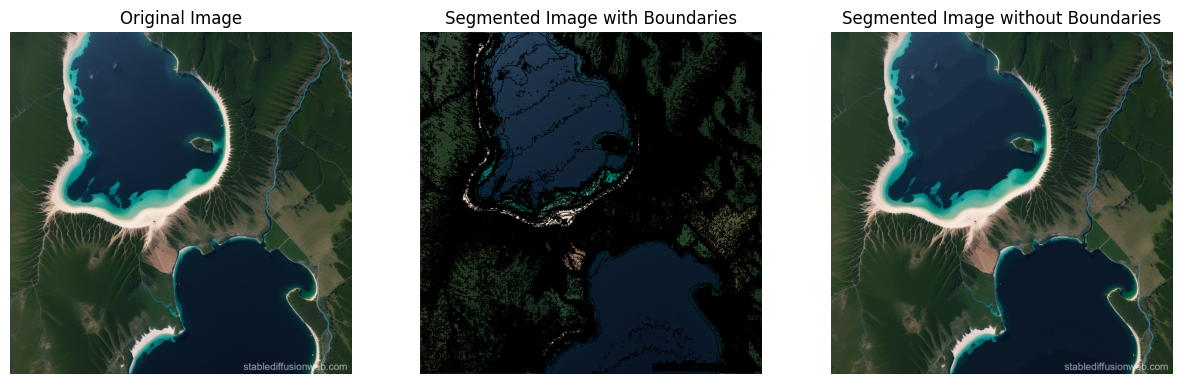

In [5]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from collections import deque
from tqdm import tqdm

class ImagePreprocess:
    def __init__(self, path, scale=25):
        self.im = imread(path)
        self.M, self.N, self.O = self.im.shape
        self.seg_map = np.zeros((self.M, self.N), dtype=int)
        self.directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        self.scale = scale
        self.im_copy = np.copy(self.im)
        self.final_image = np.copy(self.im)
    
    def in_bounds(self, x, y):
        return 0 <= x < self.M and 0 <= y < self.N
    
    def region_growing(self):
        segment_id = 1
        total_iterations = self.M * self.N
        with tqdm(total=total_iterations, desc='Segmenting') as pbar:
            for i in range(self.M):
                for j in range(self.N):
                    if self.seg_map[i, j] == 0:
                        queue = deque([(i, j)])
                        self.seg_map[i, j] = segment_id
                        segment_color = self.im[i, j].astype(np.float64)
                        segment_size = 1
                        
                        while queue:
                            x, y = queue.popleft()
                            for dx, dy in self.directions:
                                nx, ny = x + dx, y + dy
                                if self.in_bounds(nx, ny) and self.seg_map[nx, ny] == 0:
                                    color_diff = np.linalg.norm(self.im[nx, ny] - segment_color / segment_size)
                                    if color_diff < self.scale:
                                        queue.append((nx, ny))
                                        self.seg_map[nx, ny] = segment_id
                                        segment_color += self.im[nx, ny]
                                        segment_size += 1
                            pbar.update(1)
                        segment_id += 1
        
        # Update image with segment average colors by iterating over every element
        segment_sums = np.zeros((segment_id, self.O), dtype=np.float64)
        segment_counts = np.zeros(segment_id, dtype=int)
        
        with tqdm(total=total_iterations, desc='Calculating Averages') as pbar:
            for i in range(self.M):
                for j in range(self.N):
                    seg_id = self.seg_map[i, j]
                    segment_sums[seg_id] += self.im[i, j]
                    segment_counts[seg_id] += 1
                    pbar.update(1)
        
        valid_counts = segment_counts.copy()
        valid_counts[valid_counts == 0] = 1 
        segment_averages = segment_sums / valid_counts[:, None]

        default_color = np.mean(self.im, axis=(0, 1))
        segment_averages[segment_counts == 0] = default_color
        
        with tqdm(total=total_iterations, desc='Updating Segments') as pbar:
            for i in range(self.M):
                for j in range(self.N):
                    seg_id = self.seg_map[i, j]
                    self.im_copy[i, j] = segment_averages[seg_id]
                    pbar.update(1)
    
    def draw_boundaries(self):
        boundary_mask = np.zeros((self.M, self.N), dtype=bool)
        with tqdm(total=self.M * self.N, desc='Drawing Boundaries') as pbar:
            for i in range(1, self.M-1):
                for j in range(1, self.N-1):
                    if (self.seg_map[i, j] != self.seg_map[i+1, j] or
                        self.seg_map[i, j] != self.seg_map[i, j+1] or
                        self.seg_map[i, j] != self.seg_map[i-1, j] or
                        self.seg_map[i, j] != self.seg_map[i, j-1]):
                        boundary_mask[i, j] = True
                    pbar.update(1)
                    
        self.final_image[boundary_mask] = [0, 0, 0]
    
    def plot_images(self):
        self.region_growing()
        self.draw_boundaries()
        
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(self.im)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(self.final_image)
        plt.title('Segmented Image with Boundaries')
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.imshow(self.im_copy)
        plt.title('Segmented Image without Boundaries')
        plt.axis('off')
        
        plt.show()

path = 'image.jpg'
image_preprocess = ImagePreprocess(path, scale=5)
image_preprocess.plot_images()

In [9]:
import pandas as pd
import ee
ee.Initialize()

def read_tsv_to_dataframe(file_path, selected_columns=None):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    header = lines[0].strip().split('\t')

    data = []

    for line in lines[3:]:
        fields = line.strip().split('\t')
        data.append(fields[:211])

    df = pd.DataFrame(data, columns=header)
    
    if selected_columns is not None:
        df = df[selected_columns]
        
    # Convert Julian Day and Year to date
    df['Year'] = df['Year_LBAMIP'].astype(float).astype(int)
    df['Julian_Day'] = df['DoY_LBAMIP'].astype(float).astype(int)
    df['date'] = pd.to_datetime(df['Year'], format='%Y') + pd.to_timedelta(df['Julian_Day'] - 1, unit='D')
    
    return df

def combined_data(Towers=['K67', 'K77', 'K83']):
    file_head = 'CD32_Fluxes_Brazil_1842/data/'
    file_tail = 'day_CfluxBF.txt'
    #selected_columns = ['Year_LBAMIP', 'DoY_LBAMIP', 'Hour_LBAMIP', 'NEEnogap_5day_sco2_ust']
    selected_columns = ['Year_LBAMIP', 'DoY_LBAMIP', 'Hour_LBAMIP', 'GEP_5day_sco2_ust']
    data_dict = {}
    lst = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2')
    i_date = '2000-01-01'
    f_date = '2007-01-01'
    scale = 500
    lst = lst.select('SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'SR_CLOUD_QA', 'SR_ATMOS_OPACITY', 'ST_B6').filterDate(i_date, f_date)
    
    pml = ee.ImageCollection("CAS/IGSNRR/PML/V2_v017")
    pml = pml.select('Ec','Es','Ei').filterDate(i_date, f_date)
    
    lst_raw = ee.ImageCollection('LANDSAT/LE07/C02/T1')
    lst_raw = lst_raw.select('B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'B6_VCID_1').filterDate(i_date, f_date)
    
    def add_year_and_julian_day(df):
        df['date_str'] = df['id'].str.split('_').str[-1]
        df['date'] = pd.to_datetime(df['date_str'], format='%Y%m%d')
        df = df.drop(columns=['date_str'])
    
        return df
    
    def add_date_column(df):
        # Ensure the 'id' column exists
        if 'id' not in df.columns:
            raise ValueError("DataFrame must contain an 'id' column")
        
        # Convert the 'id' column to datetime and add as new 'date' column
        df['date'] = pd.to_datetime(df['id'], format='%Y-%m-%d')
        
        return df

    for tower in Towers:
        if tower == 'K67':
            poi = ee.Geometry.Point(-54.959, -2.857)
            poi_buffer = poi.buffer(150).bounds()
        elif tower == 'K77':
            poi = ee.Geometry.Point(-54.8885, -3.0202)
            poi_buffer = poi.buffer(150).bounds()
        elif tower == 'K83':
            poi = ee.Geometry.Point(-54.9707, -3.017)
            poi_buffer = poi.buffer(150).bounds()
        elif tower == 'K34':
            poi = ee.Geometry.Point(-60.2091, -2.5)
        elif tower == 'RJA':
            poi = ee.Geometry.Point(-61.9331, -10.078)
        file_path = file_head + tower + file_tail
        ec_df = read_tsv_to_dataframe(file_path, selected_columns)
        #ec_df.rename(columns={'Hour_LBAMIP': 'Hour', 'NEEnogap_5day_sco2_ust': 'NEE'}, inplace=True)
        ec_df.rename(columns={'Hour_LBAMIP': 'Hour', 'GEP_5day_sco2_ust': 'NEE'}, inplace=True)
        
        lst_poi = lst.getRegion(poi, scale).getInfo()
        sat_df = pd.DataFrame(lst_poi[1:], columns=lst_poi[0])
        sat_df = add_year_and_julian_day(sat_df)       
        for column in ['SR_B1','SR_B2','SR_B3','SR_B4','SR_B5','SR_B7']:
            sat_df[column] = sat_df[column].astype(float) * 2.75e-05
        sat_df['ST_B6'] = sat_df['ST_B6'].astype(float) * 0.00341802
        sat_df['SR_ATMOS_OPACITY'] = sat_df['SR_ATMOS_OPACITY'].astype(float) * 0.001
        sat_df.drop(sat_df[sat_df['SR_ATMOS_OPACITY'] >= 0.3].index, inplace=True)
        sat_df['NDVI'] = (sat_df['SR_B4'].astype(float) - sat_df['SR_B3'].astype(float)) / (sat_df['SR_B4'].astype(float) + sat_df['SR_B3'].astype(float))
        sat_df['EVI'] = 2.5 * (sat_df['SR_B4'].astype(float) - sat_df['SR_B3'].astype(float)) / (sat_df['SR_B4'].astype(float) + 2.4 * sat_df['SR_B3'].astype(float) + 1)
        
        lst_raw_poi = lst_raw.getRegion(poi, scale).getInfo()
        sat_raw_df = pd.DataFrame(lst_raw_poi[1:], columns=lst_raw_poi[0])
        sat_raw_df = add_year_and_julian_day(sat_raw_df)  
        
        pml_poi = pml.getRegion(poi_buffer, scale).getInfo()
        pml_df = pd.DataFrame(pml_poi[1:], columns=pml_poi[0])
        pml_df = add_date_column(pml_df)
        
        df = pd.merge(ec_df, sat_df, on='date', how='inner')
        #df = pd.merge(df, sat_raw_df, on='date', how='inner')
        #df = pd.merge(ec_df, pml_df, on='date', how='inner')
        #df = pd.merge(df, pml_df, on='date', how='inner')
        '''
        df['D1'] = df['B1'].astype(float) - df['SR_B1'].astype(float)
        df['D2'] = df['B2'].astype(float) - df['SR_B2'].astype(float)
        df['D3'] = df['B3'].astype(float) - df['SR_B3'].astype(float)
        df['D4'] = df['B4'].astype(float) - df['SR_B4'].astype(float)
        df['D5'] = df['B5'].astype(float) - df['SR_B5'].astype(float)
        df['D7'] = df['B7'].astype(float) - df['SR_B7'].astype(float)
        '''
        
        data_dict[tower] = df
    
    return data_dict

data_dict = combined_data()
data_dict['K67'].head()

,Year_LBAMIP,DoY_LBAMIP,Hour,NEE,Year,Julian_Day,date,id,longitude,latitude,...,SR_B2,SR_B3,SR_B4,SR_B5,SR_B7,SR_CLOUD_QA,SR_ATMOS_OPACITY,ST_B6,NDVI,EVI
0,2.0020000000000000e+03,1.6600000000000000e+02,0.0000000000000000e+00,-9.9990000000000000e+03,2002,166,2002-06-15,LE07_227062_20020615,-54.961175,-2.858888,...,0.426525,0.436837,0.624387,0.498823,0.408403,5.0,0.167,148.875279,0.176730,0.175425
1,2.0020000000000000e+03,1.8200000000000000e+02,0.0000000000000000e+00,-9.9990000000000000e+03,2002,182,2002-07-01,LE07_227062_20020701,-54.961175,-2.858888,...,0.230148,0.218872,0.471158,0.334207,0.247528,1.0,0.145,151.196115,0.365615,0.315917
2,2.0020000000000000e+03,1.9800000000000000e+02,0.0000000000000000e+00,7.5356835267713018e+00,2002,198,2002-07-17,LE07_227062_20020717,-54.961175,-2.858888,...,0.260453,0.247995,0.504158,0.358270,0.271260,4.0,0.245,152.344569,0.340573,0.305050
3,2.0020000000000000e+03,2.4600000000000000e+02,0.0000000000000000e+00,6.2894027777777772e+00,2002,246,2002-09-03,LE07_227062_20020903,-54.961175,-2.858888,...,0.326068,0.321420,0.478747,0.391022,0.332998,6.0,0.249,148.461699,0.196618,0.174796
4,2.0030000000000000e+03,2.5000000000000000e+01,0.0000000000000000e+00,9.0683247974537036e+00,2003,25,2003-01-25,LE07_227062_20030125,-54.961175,-2.858888,...,1.077340,1.419523,0.741868,0.568095,0.440798,25.0,0.273,133.801811,-0.313527,-0.329040
